## Analysis of Survey Data for AI vs. Human-Generated Messages

Describe ...


#### Load Modules

In [34]:
import sys, os
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style("ticks")


#### Load and inspect data

In [35]:
#df = pd.read_csv('../../data/uae_survey_cleaned_reversed_reduced_avg.csv')
#df.head(3)

In [36]:
df = pd.read_csv('../../data/uae_survey_cleaned_reversed_reduced_avg_fatalism_scales.csv')
df.head(3)

,Duration (in seconds),Exlcude_Speed,Finished,clarity_ai_mw_01_1,clarity_ai_mw_02_1,clarity_ai_mw_03_1,clarity_ai_mw_04_1,clarity_ai_mw_05_1,clarity_ai_wd_01_1,clarity_ai_wd_02_1,...,nationality,work,car_driving,religion,marital,education_years,income,women_driver_status,migrant_worker_status,young_driver_status
0,472,1,1,5,4,4,3,4,4,4,...,uae,job,1.0,muslim,single,4.0,125000.0,1,0,0
1,413,1,1,4,3,3,1,3,5,4,...,uae,student,4.0,muslim,single,1.0,65000.0,1,0,1
2,669,1,1,4,3,5,1,4,3,4,...,saudi,NaN,6.0,muslim,single,3.0,30000.0,0,1,0


In [37]:
df.describe()

,Duration (in seconds),Exlcude_Speed,Finished,clarity_ai_mw_01_1,clarity_ai_mw_02_1,clarity_ai_mw_03_1,clarity_ai_mw_04_1,clarity_ai_mw_05_1,clarity_ai_wd_01_1,clarity_ai_wd_02_1,...,age,gender_1man_2woman,english_first_language_0no_1yes,time_in_uae(1alllife|2=0-3yrs|3=4-7yrs|9morethan8years),car_driving,education_years,income,women_driver_status,migrant_worker_status,young_driver_status
count,117.000000,117.0,117.0,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,94.000000,115.000000,117.000000,116.000000,105.000000,114.000000,110.000000,117.000000,117.000000,117.000000
mean,867.538462,1.0,1.0,4.145299,3.897436,4.059829,3.786325,3.854701,3.837607,3.854701,...,22.500000,1.765217,0.119658,2.034483,-13.050476,2.877193,52772.727273,0.512821,0.256410,0.427350
std,476.900979,0.0,0.0,1.219560,1.199027,1.191135,1.325018,1.240585,1.338793,1.378811,...,5.237889,0.445847,0.325957,2.512338,39.518447,1.785588,43386.392635,0.501985,0.438529,0.496822
min,300.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,18.000000,1.000000,0.000000,1.000000,-99.000000,0.000000,10000.000000,0.000000,0.000000,0.000000
25%,547.000000,1.0,1.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,19.000000,2.000000,0.000000,1.000000,1.000000,1.250000,30000.000000,0.000000,0.000000,0.000000
50%,763.000000,1.0,1.0,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,20.500000,2.000000,0.000000,1.000000,2.000000,3.000000,30000.000000,1.000000,0.000000,0.000000
75%,1043.000000,1.0,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,23.000000,2.000000,0.000000,1.000000,5.000000,4.000000,65000.000000,1.000000,1.000000,1.000000
max,3428.000000,1.0,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,49.000000,3.000000,1.000000,9.000000,22.000000,6.000000,150000.000000,1.000000,1.000000,1.000000


#### Prepare pivoted dataframe

In [38]:
df_clarity_hum_mw             = pd.DataFrame()
df_clarity_hum_mw['rating']   = df.filter(regex = 'clarity_hum_mw',axis=1).mean().values
df_clarity_hum_mw['type']     = 'Human'
df_clarity_hum_mw['audience'] = 'Migrant Workers'
df_clarity_hum_mw['question'] = 'Clarity'

df_clarity_hum_wd             = pd.DataFrame()
df_clarity_hum_wd['rating']   = df.filter(regex = 'clarity_hum_wd',axis=1).mean().values
df_clarity_hum_wd['type']     = 'Human'
df_clarity_hum_wd['audience'] = 'Women Drivers'
df_clarity_hum_wd['question'] = 'Clarity'

df_clarity_hum_yd             = pd.DataFrame()
df_clarity_hum_yd['rating']   = df.filter(regex = 'clarity_hum_yd',axis=1).mean().values
df_clarity_hum_yd['type']     = 'Human'
df_clarity_hum_yd['audience'] = 'Young Drivers'
df_clarity_hum_yd['question'] = 'Clarity'

df_clarity_ai_mw             = pd.DataFrame()
df_clarity_ai_mw['rating']   = df.filter(regex = 'clarity_ai_mw',axis=1).mean().values
df_clarity_ai_mw['type']     = 'AI'
df_clarity_ai_mw['audience'] = 'Migrant Workers'
df_clarity_ai_mw['question'] = 'Clarity'

df_clarity_ai_wd             = pd.DataFrame()
df_clarity_ai_wd['rating']   = df.filter(regex = 'clarity_ai_wd',axis=1).mean().values
df_clarity_ai_wd['type']     = 'AI'
df_clarity_ai_wd['audience'] = 'Women Drivers'
df_clarity_ai_wd['question'] = 'Clarity'

df_clarity_ai_yd             = pd.DataFrame()
df_clarity_ai_yd['rating']   = df.filter(regex = 'clarity_ai_yd',axis=1).mean().values
df_clarity_ai_yd['type']     = 'AI'
df_clarity_ai_yd['audience'] = 'Young Drivers'
df_clarity_ai_yd['question'] = 'Clarity'

df_quality_hum_mw             = pd.DataFrame()
df_quality_hum_mw['rating']   = df.filter(regex = 'quality_hum_mw',axis=1).mean().values
df_quality_hum_mw['type']     = 'Human'
df_quality_hum_mw['audience'] = 'Migrant Workers'
df_quality_hum_mw['question'] = 'Quality'

df_quality_hum_wd             = pd.DataFrame()
df_quality_hum_wd['rating']   = df.filter(regex = 'quality_hum_wd',axis=1).mean().values
df_quality_hum_wd['type']     = 'Human'
df_quality_hum_wd['audience'] = 'Women Drivers'
df_quality_hum_wd['question'] = 'Quality'

df_quality_hum_yd             = pd.DataFrame()
df_quality_hum_yd['rating']   = df.filter(regex = 'quality_hum_yd',axis=1).mean().values
df_quality_hum_yd['type']     = 'Human'
df_quality_hum_yd['audience'] = 'Young Drivers'
df_quality_hum_yd['question'] = 'Quality'

df_quality_ai_mw             = pd.DataFrame()
df_quality_ai_mw['rating']   = df.filter(regex = 'quality_ai_mw',axis=1).mean().values
df_quality_ai_mw['type']     = 'AI'
df_quality_ai_mw['audience'] = 'Migrant Workers'
df_quality_ai_mw['question'] = 'Quality'

df_quality_ai_wd             = pd.DataFrame()
df_quality_ai_wd['rating']   = df.filter(regex = 'quality_ai_wd',axis=1).mean().values
df_quality_ai_wd['type']     = 'AI'
df_quality_ai_wd['audience'] = 'Women Drivers'
df_quality_ai_wd['question'] = 'Quality'

df_quality_ai_yd             = pd.DataFrame()
df_quality_ai_yd['rating']   = df.filter(regex = 'quality_ai_yd',axis=1).mean().values
df_quality_ai_yd['type']     = 'AI'
df_quality_ai_yd['audience'] = 'Young Drivers'
df_quality_ai_yd['question'] = 'Quality'

In [39]:
df_all = pd.concat([df_clarity_hum_mw, df_clarity_hum_wd, df_clarity_hum_yd, df_clarity_ai_mw, df_clarity_ai_wd, df_clarity_ai_yd,
                    df_quality_hum_mw, df_quality_hum_wd, df_quality_hum_yd, df_quality_ai_mw, df_quality_ai_wd, df_quality_ai_yd ], ignore_index = True)
df_all.to_csv('../../data/df_all.csv')
df_all.head()

,rating,type,audience,question
0,4.495726,Human,Migrant Workers,Clarity
1,4.230769,Human,Migrant Workers,Clarity
2,3.871795,Human,Migrant Workers,Clarity
3,4.213675,Human,Migrant Workers,Clarity
4,4.350427,Human,Migrant Workers,Clarity


In [40]:
df_all.groupby(['type','question']).mean(['rating'])

rating
type  question          
AI    Clarity   3.828490
      Quality   3.962393
Human Clarity   4.113390
      Quality   4.071795

In [41]:
df_all.groupby(['type','question']).std(ddof = 1, numeric_only = True)

rating
type  question          
AI    Clarity   0.149807
      Quality   0.164462
Human Clarity   0.316082
      Quality   0.345702

#### Plot Swarm/Violinplot: AI vs. Human (all messages, clarity and quality ratings)

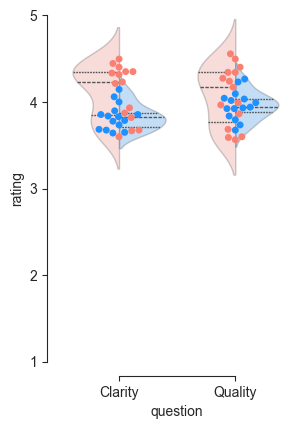

In [42]:
plt.figure(figsize = (3.,4.5))

ax = sns.violinplot(data=df_all, x="question", y="rating", hue="type", 
                    split=True, inner="quart", linewidth=1, palette={"Human": "salmon", "AI": "dodgerblue"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]):
    violin.set_alpha(alpha)

sns.swarmplot(data=df_all, x="question", y="rating", hue="type",
              palette={"Human": "salmon", "AI": "dodgerblue"});

#plt.legend(bbox_to_anchor=(1.0, 1), borderaxespad=0);
#plt.legend(loc = 3);
plt.legend([],[], frameon=False)
plt.ylim(1,5);
plt.yticks(np.arange(1,6))
sns.despine(offset= 10, trim=True);


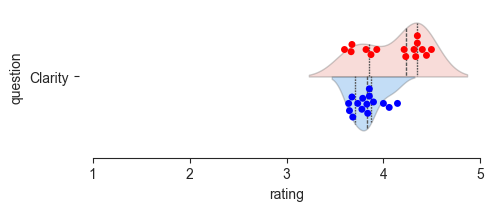

In [43]:
df_clarity = df_all[df_all['question'] == 'Clarity']

plt.figure(figsize = (5,1.75))
ax = sns.violinplot(data=df_clarity, y="question", x="rating", hue="type", 
               split=True, inner="quart", linewidth=1,
               palette={"Human": "salmon", "AI": "dodgerblue"});

for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]):
    violin.set_alpha(alpha)

sns.swarmplot(data=df_clarity, y="question", x="rating", 
              hue="type", dodge = True, palette={"Human": "r", "AI": "b"});

plt.legend([],[], frameon=False)
plt.xlim(1,5);
plt.xticks(np.arange(1,6,1))
sns.despine(offset= 10, trim=True);

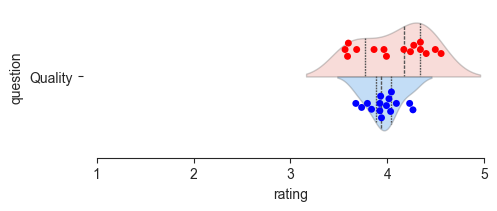

In [46]:
df_quality = df_all[df_all['question'] == 'Quality']

plt.figure(figsize = (5,1.75))
ax = sns.violinplot(data=df_quality, y="question", x="rating", hue="type", 
               split=True, inner="quart", linewidth=1,
               palette={"Human": "salmon", "AI": "dodgerblue"});

for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]):
    violin.set_alpha(alpha)

sns.swarmplot(data=df_quality, y="question", x="rating", 
              hue="type", dodge = True, palette={"Human": "r", "AI": "b"});

plt.legend([],[], frameon=False)
plt.xlim(1,5);
plt.xticks(np.arange(1,6,1))
sns.despine(offset= 10, trim=True);

### By Subaudiences

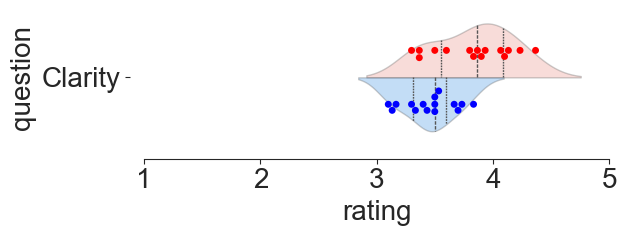

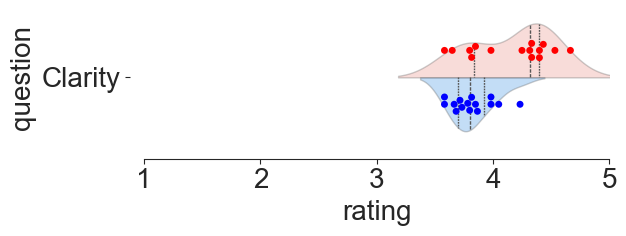

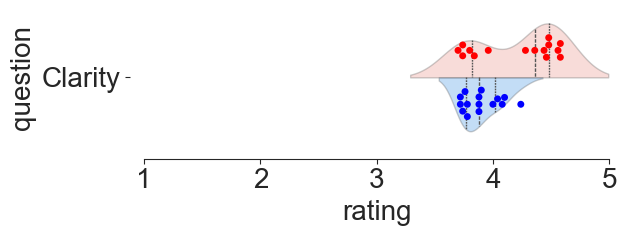

In [73]:

var = 6
# Migrant Workers
df_bygroup = df[df['migrant_worker_status'] == 1] 

df_clarity_allmessages_hum_bygroup             = pd.DataFrame()
df_clarity_allmessages_hum_bygroup['rating']   = df_bygroup.filter(regex = 'clarity_hum',axis=1).mean().values
df_clarity_allmessages_hum_bygroup['type']     = 'Human'
df_clarity_allmessages_hum_bygroup['question'] = 'Clarity'
df_clarity_allmessages_ai_bygroup              = pd.DataFrame()
df_clarity_allmessages_ai_bygroup['rating']    = df_bygroup.filter(regex = 'clarity_ai',axis=1).mean().values
df_clarity_allmessages_ai_bygroup['type']      = 'AI'
df_clarity_allmessages_ai_bygroup['question']  = 'Clarity'
df_clarity_allmessages_bygroup                 = pd.concat([df_clarity_allmessages_hum_bygroup, df_clarity_allmessages_ai_bygroup])

plt.figure(figsize = (var,1.75))
ax = sns.violinplot(data = df_clarity_allmessages_bygroup, y="question", x="rating", hue="type", split=True, inner="quart", linewidth=1, palette={"Human": "salmon", "AI": "dodgerblue"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]): violin.set_alpha(alpha)
sns.swarmplot(data = df_clarity_allmessages_bygroup, y="question", x="rating", hue="type", dodge = True, palette={"Human": "r", "AI": "b"});
plt.legend([],[], frameon=False); plt.xlim(1,5); plt.xticks(np.arange(1,6,1)); sns.despine(offset= 10, trim=True);
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(20)


# Women Drivers
df_bygroup = df[df['women_driver_status'] == 1] 

df_clarity_allmessages_hum_bygroup             = pd.DataFrame()
df_clarity_allmessages_hum_bygroup['rating']   = df_bygroup.filter(regex = 'clarity_hum',axis=1).mean().values
df_clarity_allmessages_hum_bygroup['type']     = 'Human'
df_clarity_allmessages_hum_bygroup['question'] = 'Clarity'
df_clarity_allmessages_ai_bygroup              = pd.DataFrame()
df_clarity_allmessages_ai_bygroup['rating']    = df_bygroup.filter(regex = 'clarity_ai',axis=1).mean().values
df_clarity_allmessages_ai_bygroup['type']      = 'AI'
df_clarity_allmessages_ai_bygroup['question']  = 'Clarity'
df_clarity_allmessages_bygroup                 = pd.concat([df_clarity_allmessages_hum_bygroup, df_clarity_allmessages_ai_bygroup])

plt.figure(figsize = (var,1.75))
ax = sns.violinplot(data = df_clarity_allmessages_bygroup, y="question", x="rating", hue="type", split=True, inner="quart", linewidth=1, palette={"Human": "salmon", "AI": "dodgerblue"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]): violin.set_alpha(alpha)
sns.swarmplot(data = df_clarity_allmessages_bygroup, y="question", x="rating", hue="type", dodge = True, palette={"Human": "r", "AI": "b"});
plt.legend([],[], frameon=False); plt.xlim(1,5); plt.xticks(np.arange(1,6,1)); sns.despine(offset= 10, trim=True);
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(20)


# Young Drivers
df_bygroup = df[df['young_driver_status'] == 1] 

df_clarity_allmessages_hum_bygroup             = pd.DataFrame()
df_clarity_allmessages_hum_bygroup['rating']   = df_bygroup.filter(regex = 'clarity_hum',axis=1).mean().values
df_clarity_allmessages_hum_bygroup['type']     = 'Human'
df_clarity_allmessages_hum_bygroup['question'] = 'Clarity'
df_clarity_allmessages_ai_bygroup              = pd.DataFrame()
df_clarity_allmessages_ai_bygroup['rating']    = df_bygroup.filter(regex = 'clarity_ai',axis=1).mean().values
df_clarity_allmessages_ai_bygroup['type']      = 'AI'
df_clarity_allmessages_ai_bygroup['question']  = 'Clarity'
df_clarity_allmessages_bygroup                 = pd.concat([df_clarity_allmessages_hum_bygroup, df_clarity_allmessages_ai_bygroup])

plt.figure(figsize = (var,1.75))
ax = sns.violinplot(data = df_clarity_allmessages_bygroup, y="question", x="rating", hue="type", split=True, inner="quart", linewidth=1, palette={"Human": "salmon", "AI": "dodgerblue"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]): violin.set_alpha(alpha)
sns.swarmplot(data = df_clarity_allmessages_bygroup, y="question", x="rating", hue="type", dodge = True, palette={"Human": "r", "AI": "b"});
plt.legend([],[], frameon=False); plt.xlim(1,5); plt.xticks(np.arange(1,6,1)); sns.despine(offset= 10, trim=True);
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(20)

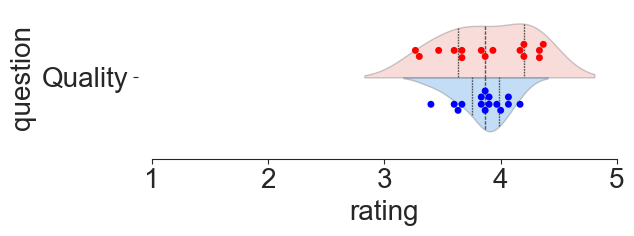

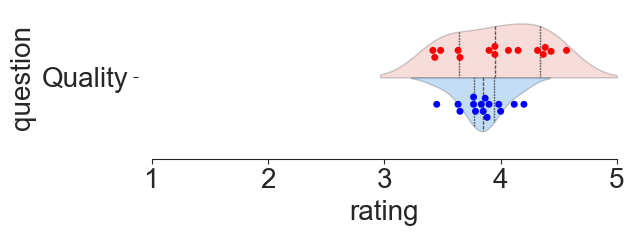

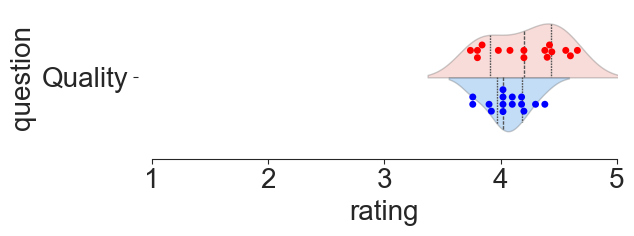

In [74]:

var = 6
# Migrant Workers
df_bygroup = df[df['migrant_worker_status'] == 1] 

df_quality_allmessages_hum_bygroup             = pd.DataFrame()
df_quality_allmessages_hum_bygroup['rating']   = df_bygroup.filter(regex = 'quality_hum',axis=1).mean().values
df_quality_allmessages_hum_bygroup['type']     = 'Human'
df_quality_allmessages_hum_bygroup['question'] = 'Quality'
df_quality_allmessages_ai_bygroup              = pd.DataFrame()
df_quality_allmessages_ai_bygroup['rating']    = df_bygroup.filter(regex = 'quality_ai',axis=1).mean().values
df_quality_allmessages_ai_bygroup['type']      = 'AI'
df_quality_allmessages_ai_bygroup['question']  = 'Quality'
df_quality_allmessages_bygroup                 = pd.concat([df_quality_allmessages_hum_bygroup, df_quality_allmessages_ai_bygroup])

plt.figure(figsize = (var,1.75))
ax = sns.violinplot(data = df_quality_allmessages_bygroup, y="question", x="rating", hue="type", split=True, inner="quart", linewidth=1, palette={"Human": "salmon", "AI": "dodgerblue"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]): violin.set_alpha(alpha)
sns.swarmplot(data = df_quality_allmessages_bygroup, y="question", x="rating", hue="type", dodge = True, palette={"Human": "r", "AI": "b"});
plt.legend([],[], frameon=False); plt.xlim(1,5); plt.xticks(np.arange(1,6,1)); sns.despine(offset= 10, trim=True);
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(20)


# Women Drivers
df_bygroup = df[df['women_driver_status'] == 1] 

df_quality_allmessages_hum_bygroup             = pd.DataFrame()
df_quality_allmessages_hum_bygroup['rating']   = df_bygroup.filter(regex = 'quality_hum',axis=1).mean().values
df_quality_allmessages_hum_bygroup['type']     = 'Human'
df_quality_allmessages_hum_bygroup['question'] = 'Quality'
df_quality_allmessages_ai_bygroup              = pd.DataFrame()
df_quality_allmessages_ai_bygroup['rating']    = df_bygroup.filter(regex = 'quality_ai',axis=1).mean().values
df_quality_allmessages_ai_bygroup['type']      = 'AI'
df_quality_allmessages_ai_bygroup['question']  = 'Quality'
df_quality_allmessages_bygroup                 = pd.concat([df_quality_allmessages_hum_bygroup, df_quality_allmessages_ai_bygroup])

plt.figure(figsize = (var,1.75))
ax = sns.violinplot(data = df_quality_allmessages_bygroup, y="question", x="rating", hue="type", split=True, inner="quart", linewidth=1, palette={"Human": "salmon", "AI": "dodgerblue"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]): violin.set_alpha(alpha)
sns.swarmplot(data = df_quality_allmessages_bygroup, y="question", x="rating", hue="type", dodge = True, palette={"Human": "r", "AI": "b"});
plt.legend([],[], frameon=False); plt.xlim(1,5); plt.xticks(np.arange(1,6,1)); sns.despine(offset= 10, trim=True);
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(20)


# Young Drivers
df_bygroup = df[df['young_driver_status'] == 1] 

df_quality_allmessages_hum_bygroup             = pd.DataFrame()
df_quality_allmessages_hum_bygroup['rating']   = df_bygroup.filter(regex = 'quality_hum',axis=1).mean().values
df_quality_allmessages_hum_bygroup['type']     = 'Human'
df_quality_allmessages_hum_bygroup['question'] = 'Quality'
df_quality_allmessages_ai_bygroup              = pd.DataFrame()
df_quality_allmessages_ai_bygroup['rating']    = df_bygroup.filter(regex = 'quality_ai',axis=1).mean().values
df_quality_allmessages_ai_bygroup['type']      = 'AI'
df_quality_allmessages_ai_bygroup['question']  = 'Quality'
df_quality_allmessages_bygroup                 = pd.concat([df_quality_allmessages_hum_bygroup, df_quality_allmessages_ai_bygroup])

plt.figure(figsize = (var,1.75))
ax = sns.violinplot(data = df_quality_allmessages_bygroup, y="question", x="rating", hue="type", split=True, inner="quart", linewidth=1, palette={"Human": "salmon", "AI": "dodgerblue"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]): violin.set_alpha(alpha)
sns.swarmplot(data = df_quality_allmessages_bygroup, y="question", x="rating", hue="type", dodge = True, palette={"Human": "r", "AI": "b"});
plt.legend([],[], frameon=False); plt.xlim(1,5); plt.xticks(np.arange(1,6,1)); sns.despine(offset= 10, trim=True);
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(20)